In [95]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.spatial.distance import cdist
import geopandas as gpd
from itertools import product

In [96]:
woj_map = "wojewodztwa.shp"
woj_m = gpd.read_file(woj_map)

In [97]:
woj_m.head()

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,SHAPE_LENG,SHAPE_AREA,REGON,RODZAJ,geometry
0,None,WOJ,2289315,32,zachodniopomorskie,None,0,20220613,0,20120926,...,1364544,0,None,0,0,12.1323542862,3.10794349875,81168387600000,wojewodztwo,"POLYGON ((188256.168 683730.875, 189761.898 68..."
1,None,WOJ,1398751,08,lubuskie,None,0,20211210,0,20120926,...,1361674,0,None,0,0,11.0914310011,1.83850176383,97789593100000,wojewodztwo,"POLYGON ((249058.528 411232.826, 249030.522 41..."
2,None,WOJ,1994777,02,dolnośląskie,None,0,20221019,0,20120926,...,1365817,0,None,0,0,13.846094171,2.55916927233,93193464400000,wojewodztwo,"POLYGON ((351910.997 289041.305, 351818.002 28..."
3,None,WOJ,2982700,30,wielkopolskie,None,0,20220330,0,20120926,...,1363546,2982700,None,0,0,18.4097920287,3.93220020515,63125781600000,wojewodztwo,"POLYGON ((441690.785 515930.957, 441724.727 51..."
4,None,WOJ,1831001,22,pomorskie,None,0,20220906,0,20120926,...,1365552,0,None,0,0,11.7084107024,2.68945114136,19167483600000,wojewodztwo,"POLYGON ((488665.467 751328.589, 488780.891 75..."


In [98]:
kina = pd.read_csv("kina.csv")
migracje = pd.read_csv("migracje.csv")

In [99]:
kina.head()

,oid,kod KTS,województwo,powierzchnia,rok,TERYT,Wskaźniki - kina|liczba ludności na 1 miejsce w kinach stałych|||||
0,1,11200000000,małopolskie,15183,2021,12,151
1,2,12400000000,śląskie,12333,2021,24,102
2,3,20800000000,lubuskie,13988,2021,8,196
3,4,23000000000,wielkopolskie,29826,2021,30,126
4,5,23200000000,zachodniopomorskie,22905,2021,32,148


In [100]:
kina.rename(columns={
    'Wskaźniki - kina|liczba ludności na 1 miejsce w kinach stałych|||||' : 'kina'
}, inplace=True)

In [101]:
wojewodztwa = woj_m.merge(kina, left_on="JPT_NAZWA_", right_on="województwo", how="left")

In [102]:
wojewodztwa.head(16)

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,REGON,RODZAJ,geometry,oid,kod KTS,województwo,powierzchnia,rok,TERYT,kina
0,None,WOJ,2289315,32,zachodniopomorskie,None,0,20220613,0,20120926,...,81168387600000,wojewodztwo,"POLYGON ((188256.168 683730.875, 189761.898 68...",5,23200000000,zachodniopomorskie,22905,2021,32,148
1,None,WOJ,1398751,08,lubuskie,None,0,20211210,0,20120926,...,97789593100000,wojewodztwo,"POLYGON ((249058.528 411232.826, 249030.522 41...",3,20800000000,lubuskie,13988,2021,8,196
2,None,WOJ,1994777,02,dolnośląskie,None,0,20221019,0,20120926,...,93193464400000,wojewodztwo,"POLYGON ((351910.997 289041.305, 351818.002 28...",6,30200000000,dolnośląskie,19947,2021,2,90
3,None,WOJ,2982700,30,wielkopolskie,None,0,20220330,0,20120926,...,63125781600000,wojewodztwo,"POLYGON ((441690.785 515930.957, 441724.727 51...",4,23000000000,wielkopolskie,29826,2021,30,126
4,None,WOJ,1831001,22,pomorskie,None,0,20220906,0,20120926,...,19167483600000,wojewodztwo,"POLYGON ((488665.467 751328.589, 488780.891 75...",9,42200000000,pomorskie,18323,2021,22,135
5,None,WOJ,941272,16,opolskie,None,0,20221205,0,20120926,...,53141242100000,wojewodztwo,"POLYGON ((410362.99 269639.399, 410366.16 2697...",7,31600000000,opolskie,9412,2021,16,184
6,None,WOJ,1797058,04,kujawsko-pomorskie,None,0,20220330,0,20120926,...,09235061300000,wojewodztwo,"POLYGON ((441690.785 515930.957, 441653.937 51...",8,40400000000,kujawsko-pomorskie,17971,2021,4,137
7,None,WOJ,1233406,24,śląskie,None,0,20220321,0,20120926,...,27625465000000,wojewodztwo,"MULTIPOLYGON (((559302.978 302887.587, 559268....",2,12400000000,śląskie,12333,2021,24,102
8,None,WOJ,1821720,10,łódzkie,None,0,20211214,0,20120926,...,47205762600000,wojewodztwo,"POLYGON ((598629.334 417093.448, 598631.826 41...",11,51000000000,łódzkie,18219,2021,10,165
9,None,WOJ,1518007,12,małopolskie,None,0,20221206,0,20120926,...,35155428700000,wojewodztwo,"POLYGON ((631316.899 166704.316, 631331.032 16...",1,11200000000,małopolskie,15183,2021,12,151


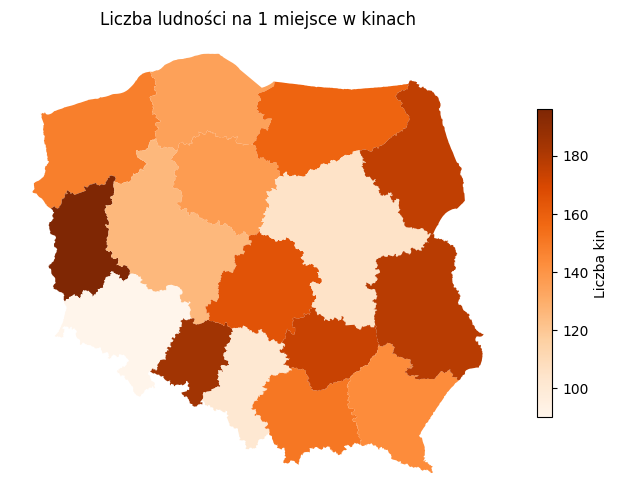

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))  

wojewodztwa.plot(
    column="kina",
    cmap="Oranges",  
    legend=True,
    legend_kwds={"label": "Liczba kin", "shrink": 0.5},  
    ax=ax
)

ax.set_title("Liczba ludności na 1 miejsce w kinach", fontsize=12)  
ax.axis("off")  


plt.show()



In [105]:
migracje.head(120)

,Kod,Nazwa,dolnośląskie,kujawsko-pomorskie,lubelskie,lubuskie,łódzkie,małopolskie,mazowieckie,opolskie,podkarpackie,podlaskie,pomorskie,śląskie,świętokrzyskie,warmińsko-mazurskie,wielkopolskie,zachodniopomorskie
0,NaN,NaN,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
1,NaN,NaN,[osoba],[osoba],[osoba],[osoba],[osoba],[osoba],[osoba],[osoba],[osoba],[osoba],[osoba],[osoba],[osoba],[osoba],[osoba],[osoba]
2,0.0,POLSKA,"9,763","4,119","3,321","2,826","4,307","10,451","20,890","2,675","3,814","2,187","9,241","7,172","2,727","3,709","8,317","4,238"
3,200000.0,DOLNOŚLĄSKIE,0,170,159,748,308,453,868,792,244,83,367,594,104,123,"1,064",381
4,400000.0,KUJAWSKO-POMORSKIE,272,0,68,99,220,172,"1,265",41,65,50,"1,569",201,43,308,"1,596",354
5,600000.0,LUBELSKIE,418,89,0,70,171,710,"4,579",67,742,103,373,348,152,106,278,136
6,800000.0,LUBUSKIE,"1,030",91,39,0,50,125,285,89,52,30,158,136,12,36,"1,165",596
7,1000000.0,ŁÓDZKIE,887,221,104,83,0,365,"2,271",192,99,72,430,636,213,122,728,166
8,1200000.0,MAŁOPOLSKIE,452,94,163,68,174,0,"1,025",120,951,52,315,"1,998",512,74,171,170
9,1400000.0,MAZOWIECKIE,604,729,"1,316",135,"1,096",674,0,78,370,796,"1,172",611,568,"1,044",558,305


In [106]:
# Pominięcie wierszy nagłówkowych i danych zagregowanych
migracje_clean = migracje.dropna(subset=['Kod']).query('Kod > 0')

# Przekształcenie do formatu długiego
migracje_long = migracje_clean.melt(
    id_vars=['Kod', 'Nazwa'], 
    var_name='destination', 
    value_name='Yij'
)


In [107]:
migracje_long.head(120)

,Kod,Nazwa,destination,Yij
0,200000.0,DOLNOŚLĄSKIE,dolnośląskie,0
1,400000.0,KUJAWSKO-POMORSKIE,dolnośląskie,272
2,600000.0,LUBELSKIE,dolnośląskie,418
3,800000.0,LUBUSKIE,dolnośląskie,"1,030"
4,1000000.0,ŁÓDZKIE,dolnośląskie,887
...,...,...,...,...
115,800000.0,LUBUSKIE,opolskie,89
116,1000000.0,ŁÓDZKIE,opolskie,192
117,1200000.0,MAŁOPOLSKIE,opolskie,120
118,1400000.0,MAZOWIECKIE,opolskie,78


In [108]:
# Konwersja wartości na liczby (usunięcie separatorów tysięcy)
migracje_long['Yij'] = (
    migracje_long['Yij']
    .str.replace(',', '.')  
    .str.replace(r'\.', '', regex=True)  
    .astype(float)  
)

In [109]:
migracje_long

,Kod,Nazwa,destination,Yij
0,200000.0,DOLNOŚLĄSKIE,dolnośląskie,0.0
1,400000.0,KUJAWSKO-POMORSKIE,dolnośląskie,272.0
2,600000.0,LUBELSKIE,dolnośląskie,418.0
3,800000.0,LUBUSKIE,dolnośląskie,1030.0
4,1000000.0,ŁÓDZKIE,dolnośląskie,887.0
...,...,...,...,...
251,2400000.0,ŚLĄSKIE,zachodniopomorskie,349.0
252,2600000.0,ŚWIĘTOKRZYSKIE,zachodniopomorskie,82.0
253,2800000.0,WARMIŃSKO-MAZURSKIE,zachodniopomorskie,146.0
254,3000000.0,WIELKOPOLSKIE,zachodniopomorskie,659.0


In [110]:
migracje_long['Nazwa'] = migracje_long['Nazwa'].str.lower()
#migracje_long.head(120).to_csv("migracje_long.csv")


In [111]:
# Utworzenie mapowania nazw regionów na liczbę kin
kina_dict = kina.set_index('województwo')['kina'].to_dict()

# Dodanie liczby kin dla origin i destination
migracje_long['K_i'] = migracje_long['Nazwa'].map(kina_dict)
migracje_long['K_j'] = migracje_long['destination'].map(kina_dict)

In [112]:
migracje_long.head()

,Kod,Nazwa,destination,Yij,K_i,K_j
0,200000.0,dolnośląskie,dolnośląskie,0.0,90,90
1,400000.0,kujawsko-pomorskie,dolnośląskie,272.0,137,90
2,600000.0,lubelskie,dolnośląskie,418.0,178,90
3,800000.0,lubuskie,dolnośląskie,1030.0,196,90
4,1000000.0,łódzkie,dolnośląskie,887.0,165,90


In [113]:
import geopandas as gpd
from itertools import product

# Obliczenie centroidów dla regionów
woj_m['centroid'] = woj_m.geometry.centroid
# Utworzenie wszystkich możliwych par regionów
gdf = woj_m[['JPT_NAZWA_', 'centroid']]
pairs = pd.DataFrame(
    list(product(gdf['JPT_NAZWA_'], repeat=2)), 
    columns=['origin_region', 'destination_region']
)

In [114]:
# Połączenie z centroidami i obliczenie odległości
pairs = pairs.merge(gdf, left_on='origin_region', right_on='JPT_NAZWA_')
pairs = pairs.merge(
    gdf, 
    left_on='destination_region', 
    right_on='JPT_NAZWA_', 
    suffixes=('_origin', '_destination')
)
pairs['distance'] = pairs.apply(
    lambda row: row['centroid_origin'].distance(row['centroid_destination']), 
    axis=1
)

In [115]:
pairs.head()

,origin_region,destination_region,JPT_NAZWA__origin,centroid_origin,JPT_NAZWA__destination,centroid_destination,distance
0,zachodniopomorskie,zachodniopomorskie,zachodniopomorskie,POINT (270760.953 640937.263),zachodniopomorskie,POINT (270760.953 640937.263),0.000000
1,zachodniopomorskie,lubuskie,zachodniopomorskie,POINT (270760.953 640937.263),lubuskie,POINT (250102.51 487061.376),155256.432521
2,zachodniopomorskie,dolnośląskie,zachodniopomorskie,POINT (270760.953 640937.263),dolnośląskie,POINT (318759.056 361174.873),283849.982331
3,zachodniopomorskie,wielkopolskie,zachodniopomorskie,POINT (270760.953 640937.263),wielkopolskie,POINT (380773.281 497126.618),181064.115499
4,zachodniopomorskie,pomorskie,zachodniopomorskie,POINT (270760.953 640937.263),pomorskie,POINT (437243.047 701836.386),177270.953797


In [116]:
migracje_long = migracje_long.merge(
    pairs[['origin_region', 'destination_region', 'distance']],
    left_on=['Nazwa', 'destination'],
    right_on=['origin_region', 'destination_region'],
    how='left'
)

In [117]:
# Zabezpieczenie przed log(0)
migracje_long['Yij'] = migracje_long['Yij'].replace(0, 1)
migracje_long['K_i'] = migracje_long['K_i'].replace(0, 1)
migracje_long['K_j'] = migracje_long['K_j'].replace(0, 1)
migracje_long['distance'] = migracje_long['distance'].replace(0, 1e-9)


In [118]:
# Transformacja logarytmiczna
migracje_long['ln_Yij'] = np.log(migracje_long['Yij'])
migracje_long['ln_Ki'] = np.log(migracje_long['K_i'])
migracje_long['ln_Kj'] = np.log(migracje_long['K_j'])
migracje_long['ln_dij'] = np.log(migracje_long['distance'])

In [119]:
import statsmodels.api as sm

X = migracje_long[['ln_Ki', 'ln_Kj', 'ln_dij']]
X = sm.add_constant(X)  
y = migracje_long['ln_Yij']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_Yij   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     174.2
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           3.71e-61
Time:                        19:10:07   Log-Likelihood:                -360.32
No. Observations:                 256   AIC:                             728.6
Df Residuals:                     252   BIC:                             742.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.6887      1.999     12.349      0.0